# Practicing Supervised Learning 

In this tutorial, we'll work with the IRIS dataset from Scikit-Learn. If you like to read more, please visit [this page](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html). The detailed information about the dataset can be found in [this wiki page](https://en.wikipedia.org/wiki/Iris_flower_data_set). This data sets consists of 3 different types of irises' (붓꽃) (Setosa, Versicolor, and Virginica) petal and sepal length (꽃잎, 꽃받침), stored in a 150x4 numpy.ndarray The rows being the samples and the columns being:  **petal length**, **petal width**, **sepal length**, and **sepal width**. This image below is from [this link](https://www.datacamp.com/community/tutorials/machine-learning-in-r). 

![alt text](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png) 


## Loading the IRIS dataset

In [ ]:
from sklearn import svm, datasets

# import IRIS dataset
iris = datasets.load_iris()

#  petal length, petal width, sepal length, sepal width
X = iris.data # (150, 4)
y = iris.target # (150, )
class_names = iris.target_names # (3,)

print("X", X[:10, :])  # first the first 10 rows
print("y", y[:10])
print("class_name", class_names)

X [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
y [0 0 0 0 0 0 0 0 0 0]
class_name ['setosa' 'versicolor' 'virginica']


## Visualizing the dataset  

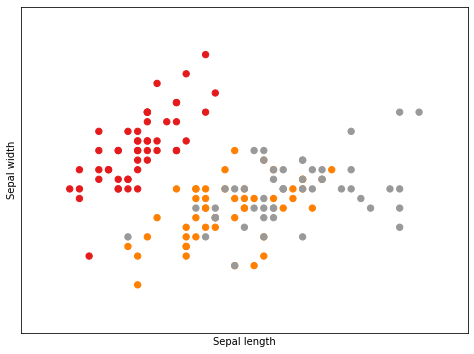

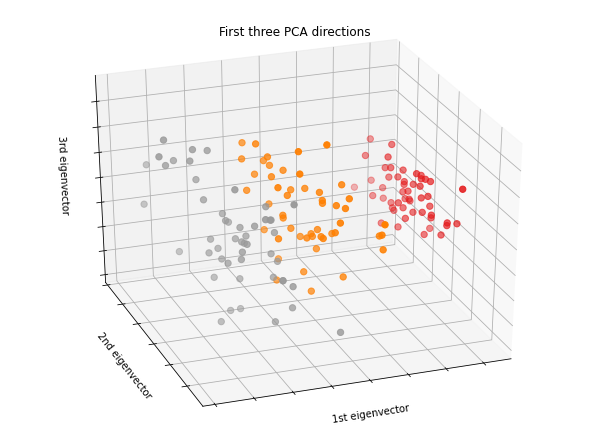

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

plt.figure(2, figsize=(8, 6))
plt.clf() # clear the current figure 

# Plot the training points
# c: colors, cmap = color mapping w/ a predefined colormap: https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html 
 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, s=40)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# find x_min/max and y_min/max 
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

# Let's do PCA for dimension reduction: 4 => 3 
X_reduced = PCA(n_components=3).fit_transform(iris.data)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## Evaluation: Confusion Matrix Visualization 

In [ ]:
from sklearn.metrics import confusion_matrix

# let's plot a confusion matrix 
# based on this sample: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py 
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False):

  cm = confusion_matrix(y_true, y_pred)
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  fig = plt.figure() 
  ax = fig.add_subplot(111) 
  cax = ax.matshow(cm, cmap=plt.cm.Blues) 

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j], fmt),
                  ha="center", va="center",
                  color="white" if cm[i, j] > thresh else "black")  

  #for (i, j), z in np.ndenumerate(cm): 
  #    ax.text(j, i, '{:3d}'.format(z), ha='center', va='center',
  #      bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

  plt.title('Confusion matrix of the classifier') 
  fig.colorbar(cax)   
  ax.set_xticklabels([''] + classes) 
  ax.set_yticklabels([''] + classes) 
  plt.xlabel('Predicted') 
  plt.ylabel('True') 

  plt.show()

## Evaluation: Confusion Matrix + Metrics

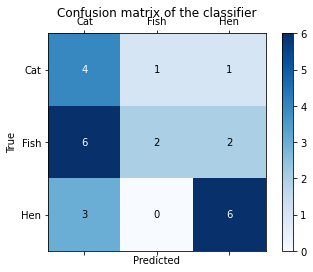

[[4 1 1]
 [6 2 2]
 [3 0 6]]
              precision    recall  f1-score   support

         Cat      0.308     0.667     0.421         6
        Fish      0.667     0.200     0.308        10
         Hen      0.667     0.667     0.667         9

    accuracy                          0.480        25
   macro avg      0.547     0.511     0.465        25
weighted avg      0.581     0.480     0.464        25



In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt 

# Constants
C="Cat"
F="Fish"
H="Hen"

# True values (i.e., ground truth)
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]
# Predicted values (i.e., estimated targets as returned by a classifier)
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]

mylist = [C, F, H]

plot_confusion_matrix(y_true, y_pred, classes=mylist)

# Print the confusion matrix
# >> sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)[source]¶
print(metrics.confusion_matrix(y_true, y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=3))



### Mini-exercise
Let's check how an imbalance dataset influences metrics. What happens if we change the distribution? 

*   Case#1: cat = 6, fish = 10, hen = 9
*   Case#2: cat = 3, fish = 17, hen = 5
 
Please check out the code and the results below. 

*   Why is Cat's precison so low? If we have only two classes: Cat & Fish, what would happen? 
*   Would case #2 be better than a naive classifier (majority voting)? 
*   Why do you think that data skewness is problematic when you use such metrics? 



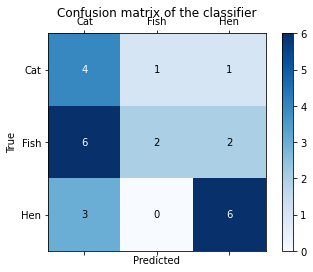

[[4 1 1]
 [6 2 2]
 [3 0 6]]
              precision    recall  f1-score   support

         Cat      0.308     0.667     0.421         6
        Fish      0.667     0.200     0.308        10
         Hen      0.667     0.667     0.667         9

    accuracy                          0.480        25
   macro avg      0.547     0.511     0.465        25
weighted avg      0.581     0.480     0.464        25



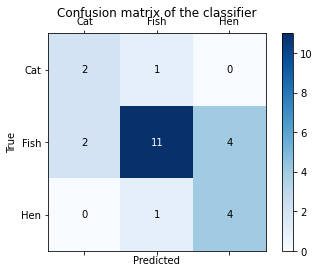

[[ 2  1  0]
 [ 2 11  4]
 [ 0  1  4]]
              precision    recall  f1-score   support

         Cat      0.500     0.667     0.571         3
        Fish      0.846     0.647     0.733        17
         Hen      0.500     0.800     0.615         5

    accuracy                          0.680        25
   macro avg      0.615     0.705     0.640        25
weighted avg      0.735     0.680     0.690        25



In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt 

# Constants
C="Cat"
F="Fish"
H="Hen"

# 1) Original Case 
# True values (i.e., ground truth)
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]
# Predicted values (i.e., estimated targets as returned by a classifier)
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]

mylist = [C, F, H]

plot_confusion_matrix(y_true, y_pred, classes=mylist)

# Print the confusion matrix
# >> sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)[source]¶
print(metrics.confusion_matrix(y_true, y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=3))


# 2) Imbalanced Case 
# True values (i.e., ground truth)
y_true = [C,C,C, F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F,F, H,H,H,H,H]
# Predicted values (i.e., estimated targets as returned by a classifier)
y_pred = [F,C,C, H,F,F,F,F,F,C,C,F,H,H,F,F,F,F,F,H, F,H,H,H,H]

plot_confusion_matrix(y_true, y_pred, classes=mylist)

# Print the confusion matrix
# >> sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)[source]¶
print(metrics.confusion_matrix(y_true, y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=3))

## Classification Practice: SVM

[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]


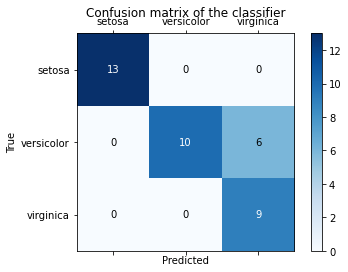

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        13
           1      1.000     0.625     0.769        16
           2      0.600     1.000     0.750         9

    accuracy                          0.842        38
   macro avg      0.867     0.875     0.840        38
weighted avg      0.905     0.842     0.844        38



In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
# random_state = np.random.RandomState(0) / default = None => auto-generate w/ random 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
# sklearn svm https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

np.set_printoptions(precision=2)

print(metrics.confusion_matrix(y_test, y_pred)) 

plot_confusion_matrix(y_test, y_pred, class_names.tolist())

print(metrics.classification_report(y_test, y_pred, digits=3))

 
 

## Evaluation: Performing Cross-Validation

Details about cross-validation can be found in this link: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

Please note that cross-validation functions (e.g., cross_val_predict, cross_val_score) have [the "**n_jobs**" parameter](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html), which specifies how many CPU cores you would like to use (default: NONE, -1: use all CPUs). 

You can use different scoring methods for cross-validation by using "**cross_val_score**(svc, x, y, cv=k_fold, scoring='precision_macro')" (Ref [Doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)).

Please note the following comments:

*   [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html): Evaluate a score by cross-validation
*   [cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html): Generate cross-validated estimates for each input data point. Generate cross-validated estimates for each input data point

In both cases, the data is split according to the cv parameter. Each sample belongs to exactly one test set, and its prediction is computed with an estimator fitted on the corresponding training set. 




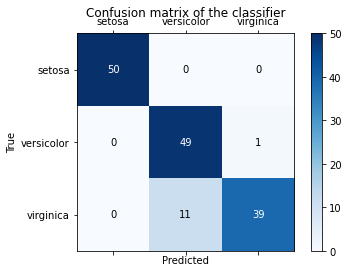

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      0.817     0.980     0.891        50
           2      0.975     0.780     0.867        50

    accuracy                          0.920       150
   macro avg      0.931     0.920     0.919       150
weighted avg      0.931     0.920     0.919       150



In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.utils.multiclass import unique_labels

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)

y_pred = cross_val_predict(classifier, X, y, cv=10)

plot_confusion_matrix(y, y_pred, class_names.tolist())

print(metrics.classification_report(y, y_pred, digits=3))

### Mini-exercise
For each class, we have 50 samples. Consider the following cases and evaluate how SVM works. For row removal, use *np.delete(X, np.s_[x:y], 0))*

*   Reduce the dataset (50 => 20)
*   Create a skewed dataset: 0: 15, 1:50, 2:50 



In [ ]:
# Reduce the dataset

In [ ]:
# Create a skewed dataset: 0: 15, 1:50, 2:50

## Feature Scaling: Would feature scaling be helpful?

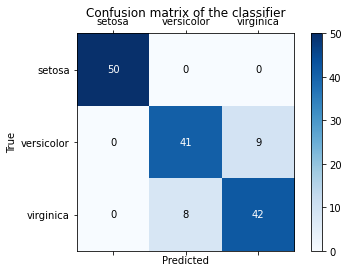

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      0.837     0.820     0.828        50
           2      0.824     0.840     0.832        50

    accuracy                          0.887       150
   macro avg      0.887     0.887     0.887       150
weighted avg      0.887     0.887     0.887       150



In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.astype(np.float64))

y_pred = cross_val_predict(classifier, X_scaled, y, cv=10)

plot_confusion_matrix(y, y_pred, class_names.tolist())

print(metrics.classification_report(y, y_pred, digits=3))

#fit = classifier.fit(X, y)
#print("feature importance: ", fit.feature_importances_)

### Mini-exercise 
Try different feature scaling methods and check how performance would change. Other scalars include (1) MinMaxScaler: ransforms features by scaling each feature to a given range, (2) MaxAbsScaler: Scale each feature by its maximum absolute value, (3) RobustScaler: Scale features using statistics that are robust to outliers

In [ ]:
# Your answer! 

## Feature Selection
Which features should we use? https://scikit-learn.org/stable/modules/feature_selection.html 


*   **Removing features with low variance**: VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.
*   **Univariate feature selection**: selecting the best features based on univariate statistical tests; e.g., SelectKBest selects features according to the k highest score
*   **Recursive feature elimination**: selecting features by recursively considering smaller and smaller sets of features; the least important features are pruned from current set of features



In [ ]:
# As an example, suppose that we have a dataset with boolean features, 
# and we want to remove all features that are either one or zero (on or off) 
# in more than 80% of the samples. 
# Boolean features are Bernoulli random variables, 
# and the variance of such variables is given by Var{X} = p(1-p)
# so we can select using the threshold .8 * (1 - .8):
# https://youtu.be/bT1p5tJwn_0

from sklearn.feature_selection import VarianceThreshold
X = [
     [0, 0, 1],
     [0, 1, 0],
     [1, 0, 0],
     [0, 1, 1],
     [0, 1, 0],
     [0, 1, 1]
]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

iris = load_iris()
X, y = iris.data, iris.target
print( X.shape )
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
print( X_new.shape )

(150, 4)
(150, 2)


## Would a different classifier be helpful?


###  Decision Tree
CART implementation in Scikit-learn uses "gini" measure instead of "information gain." Of course, you can set the criterion by saying "entropy." Here's the nice summary of Impurity Formulas used by Scikit-learn and Spark: 
![alt text](https://miro.medium.com/max/2743/1*eES0Bh8jTB73P3ad_U2aCA.png)

If you'd like to know more about the details, please refer to [this article](https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3). 



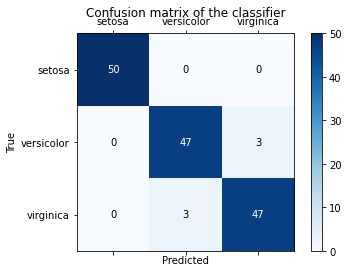

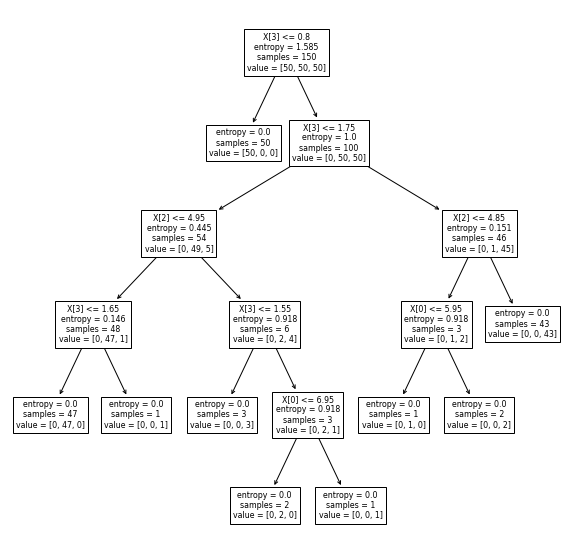

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      0.940     0.940     0.940        50
           2      0.940     0.940     0.940        50

    accuracy                          0.960       150
   macro avg      0.960     0.960     0.960       150
weighted avg      0.960     0.960     0.960       150

feature importance:  [0.   0.01 0.08 0.91]


In [ ]:
# tree.plot_tree(clf.fit(iris.data, iris.target)) 

import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.utils.multiclass import unique_labels
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
# from sklearn.preprocessing import StandardScaler

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names


#classifier = tree.DecisionTreeClassifier() # criterion default: gini 
classifier = DecisionTreeClassifier(criterion='entropy') 

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X.astype(np.float64))
y_pred = cross_val_predict(classifier, X, y, cv=10)
#y_pred = cross_val_predict(classifier, X_scaled, y, cv=10)

plot_confusion_matrix(y, y_pred, class_names.tolist())

#tree.plot_tree(classifier.fit(X, y), fontsize=7) 
plt.subplots(figsize=(10, 10))
plot_tree(classifier.fit(X, y))
plt.show()
print(metrics.classification_report(y, y_pred, digits=3))

fit = classifier.fit(X, y)
print("feature importance: ", fit.feature_importances_)

# For each decision tree, Scikit-learn calculates a nodes importance 
# using Gini Importance (default), assuming only two child nodes (binary tree). 
# for details, please check this material: https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3  

# Decision Tree: criterion : string, optional (default=”gini”)
# The function to measure the quality of a split. 
# Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.


### Random Forest -- Bagging Approach

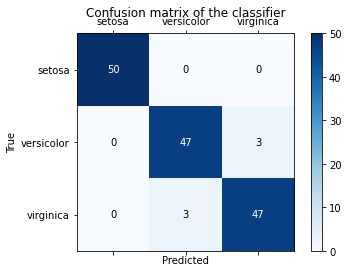

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      0.940     0.940     0.940        50
           2      0.940     0.940     0.940        50

    accuracy                          0.960       150
   macro avg      0.960     0.960     0.960       150
weighted avg      0.960     0.960     0.960       150

feature importance:  [0.09 0.02 0.41 0.48]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.utils.multiclass import unique_labels
# from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier 

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# n_estimators=100 was set to supress warning:
# /usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
# "10 in version 0.20 to 100 in 0.22.", FutureWarning)

classifier = RandomForestClassifier(n_estimators=100) 
 
y_pred = cross_val_predict(classifier, X, y, cv=10) 

plot_confusion_matrix(y, y_pred, class_names.tolist())

print(metrics.classification_report(y, y_pred, digits=3))

fit = classifier.fit(X, y)
print("feature importance: ", fit.feature_importances_)

# visualize a tree from random forest
# https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

### XGBoost -- Boosting Approach
Boosting originates from hypothesis boosting. Two popular boosting methods are adaboost and gradient boost. In this exercise, we'll use gradient boost: XGBoost, which is one of the widely used classical learning algorithms. There is also a regressor: GBRT, a gradient boosted regression tree. 

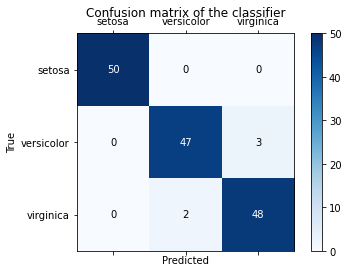

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      0.959     0.940     0.949        50
           2      0.941     0.960     0.950        50

    accuracy                          0.967       150
   macro avg      0.967     0.967     0.967       150
weighted avg      0.967     0.967     0.967       150

feature importance:  [0.   0.   0.49 0.51]


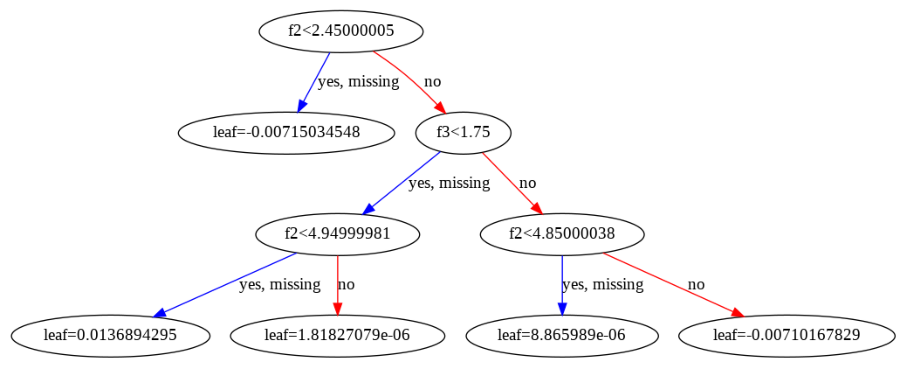

In [ ]:
import xgboost as xgb
from xgboost import plot_tree
##model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
#model.fit(x_train, y_train)
#model.score(x_test,y_test)


import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.utils.multiclass import unique_labels
# from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier 

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

classifier = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X.astype(np.float64))
y_pred = cross_val_predict(classifier, X, y, cv=10)
#y_pred = cross_val_predict(classifier, X_scaled, y, cv=10)

plot_confusion_matrix(y, y_pred, class_names.tolist())

print(metrics.classification_report(y, y_pred, digits=3))

fit = classifier.fit(X, y)
print("feature importance: ", fit.feature_importances_)

fig, ax = plt.subplots(figsize=(16, 16))
xgb.plot_tree(classifier, num_trees=4, ax=ax)
plt.show()


## Evaluation: Precision-Recall Curves and  ROC Curves 
For precision_recall curves, please look at this material: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

Precision-Recall Curves and ROC Curves bascially assume "binary classes." For plotting, we must first banarize the labels (i.e., one vs. others). 

For those who are interested in learning about how to deal with PR/ROC in multiclass conditions, this check out this excerpt from "Learning from Imbalanced Data":

>*Similarly, under the multiclass imbalanced learning scenario, the AUC values for two-class problems become multiple pairwise discriminability values [131]. To calculate such multiclass AUCs, Provost and Domingos [121] proposed a probability estimation-based approach: First, the ROC curve for each reference class wi is generated and their respective AUCs are measured. Second, all of the AUCs are combined by a weight coefficient according to the reference class’s prevalence in the data. Although this approach is quite simple in calculation, it is sensitive to the class skews for the same reason as mentioned before. To eliminate this constraint, Hand and Till [131] proposed the M measure, a generalization approach that aggregates all pairs of classes based on the inherent characteristics of the AUC. The major advantage of this method is that it is insensitive to class distribution and error costs. Interested readers can refer to [131] for a more detailed overview of this technique.*
>>[121] F. Provost and P. Domingos, “Well-Trained Pets: Improving
Probability Estimation Trees,” CeDER Working Paper: IS-00-04,
Stern School of Business, New York Univ., 2000
>>[131] D.J. Hand and R.J. Till, “A Simple Generalization of the Area
under the ROC Curve to Multiple Class Classification Problems,”
Machine Learning, vol. 45, no. 2, pp. 171-186, 2001.

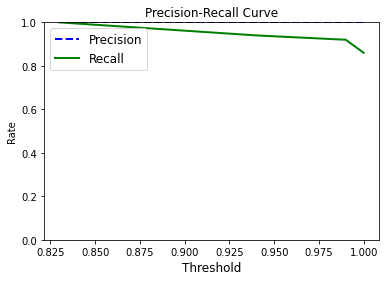

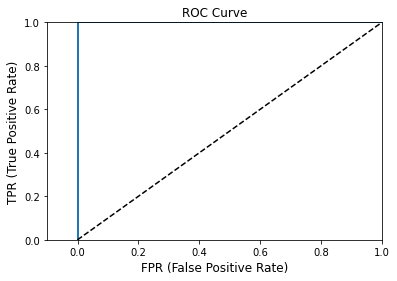

AUC_ROC:  1.0


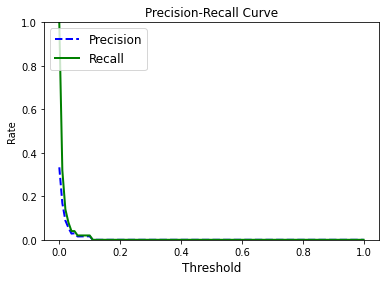

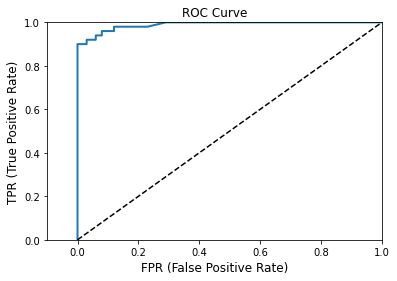

AUC_ROC:  0.9890000000000001


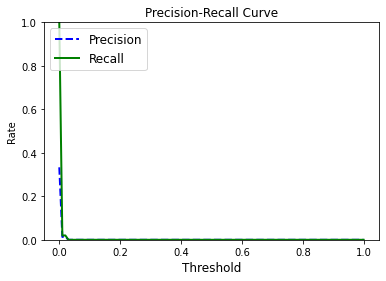

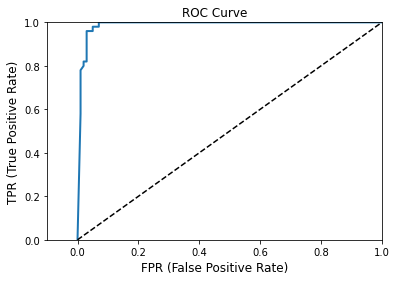

AUC_ROC:  0.9878


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn.utils.multiclass import unique_labels

from sklearn.preprocessing import label_binarize
from sklearn import linear_model

from sklearn.ensemble import RandomForestClassifier 

#y_scores = cross_val_predict(classifier, X, y, cv=10, method="decision_function")
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.title('Precision-Recall Curve') 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=12)
    plt.ylabel('Rate')
    plt.legend(loc="upper left", fontsize=12)
    plt.ylim([0, 1])

def plot_roc_curve(fpr, tpr, label=None):
    plt.title('ROC Curve') 
    plt.plot(fpr, tpr, linewidth=2, label="ROC")
    plt.plot([0, 1], [0, 1], 'k--', label="Baseline")
    plt.axis([-0.1, 1, 0, 1])
    plt.xlabel('FPR (False Positive Rate)', fontsize=12)
    plt.ylabel('TPR (True Positive Rate)', fontsize=12)

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Binarize labels in a one-vs-all fashion 
# Example:
#>>> from sklearn.preprocessing import label_binarize
#  e.g., input: label data [1, 6] (two integers) with four class labels:  1, 2, 4, 6 (four labels)
#>>> label_binarize([1, 6], classes=[1, 2, 4, 6])
#array([[1, 0, 0, 0],  // first column is label 1 (only label 1 has 1; the rest are 0)
#       [0, 0, 0, 1]]) // fourth column is label 6 (only label 6 has 1; the rest are 0) 

Y = label_binarize(y, classes=[0, 1, 2]) 
n_classes = Y.shape[1]

for i in range(n_classes):
  #sgd_clf = linear_model.SGDClassifier(max_iter=5, random_state=random_state)
  #y_scores = cross_val_predict(sgd_clf, X, Y[:, 1], cv=5, method="decision_function")

  forest_clf = RandomForestClassifier(n_estimators=100)

  # getting class probabilities for PR & ROC analyses 
  y_probas_forest = cross_val_predict(forest_clf, X, Y[:, i], cv=5, method="predict_proba")
  y_scores = y_probas_forest[:, 1]

 # print("y_scores:", y_probas_forest)
 # print("Y_train[:,0]", Y[:, i])
  
  precisions, recalls, thresholds = metrics.precision_recall_curve(Y[:, 0], y_scores)
 # print("Precisions:", precisions)
 # print("Recalls:", recalls)

  #plt.figure(figsize=(8, 4))
  plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
  #plt.xlim([-700000, 700000])
  plt.show()

  fpr, tpr, thresholds = metrics.roc_curve(Y[:, i], y_scores)
  plot_roc_curve(fpr, tpr)
  plt.show()

  print("AUC_ROC: ", metrics.roc_auc_score(Y[:, i], y_scores))

#plot_confusion_matrix(y, y_pred, class_names.tolist())
#print(metrics.classification_report(y, y_pred, digits=3))

## Hyperparameter Tuning: GridSearchCV()

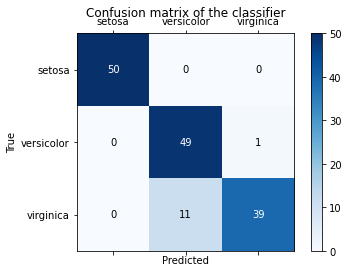

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      0.817     0.980     0.891        50
           2      0.975     0.780     0.867        50

    accuracy                          0.920       150
   macro avg      0.931     0.920     0.919       150
weighted avg      0.931     0.920     0.919       150

Best Score: 0.9733333333333334
Best Estimater_.C: 0.1


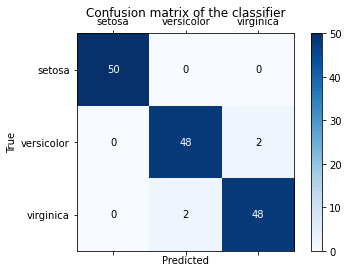

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      0.960     0.960     0.960        50
           2      0.960     0.960     0.960        50

    accuracy                          0.973       150
   macro avg      0.973     0.973     0.973       150
weighted avg      0.973     0.973     0.973       150



In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = cross_val_predict(classifier, X, y, cv=10)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)

np.set_printoptions(precision=2)

#print(metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(y, y_pred, class_names.tolist())
print(metrics.classification_report(y, y_pred, digits=3))

#plot_confusion_matrix(y_test, y_pred, class_names.tolist(), normalize=True)

from sklearn.model_selection import GridSearchCV, cross_val_score
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=classifier, param_grid=dict(C=Cs), cv=5, n_jobs=-1)
clf.fit(X, y)  
print("Best Score:", clf.best_score_)
print("Best Estimater_.C:", clf.best_estimator_.C) 
clf.score(X, y)

classifier = svm.SVC(kernel='linear', C=clf.best_estimator_.C)
y_pred = cross_val_predict(classifier, X, y, cv=10)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)
#print(metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(y, y_pred, class_names.tolist())
print(metrics.classification_report(y, y_pred, digits=3))


# Homework (Due May 2)

## 1) Handling a limited dataset: how can we imporve the performance?
First try to reduce the number of samples in the IRIS dataset. In our mini exercise, we reduced the number of samples to 15 (for class 0). Once you reduce the number of samples, use the SVM to get the baseline results. Then do the following: 1) compare several algorithms (i.e., svm, random forest, xgboost) 2) search for better parameters (e.g., in SVM, there are C value and kernel types: linear/poly/rbf; in XGBoost, there are eta: learning rate, max_depth, alpha/lambda: l1, l2 regularization). You need to google how to tune hyperparameters of each algorithm: svm, random forest, xgboost. Please use hyperparameter tuning methods: e.g., GridSearchCV(). 

#### confusion matrix

In [4]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False):

  cm = confusion_matrix(y_true, y_pred)
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  fig = plt.figure() 
  ax = fig.add_subplot(111) 
  cax = ax.matshow(cm, cmap=plt.cm.Blues) 

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j], fmt),
                  ha="center", va="center",
                  color="white" if cm[i, j] > thresh else "black")  

  plt.title('Confusion matrix of the classifier') 
  fig.colorbar(cax)   
  ax.set_xticklabels([''] + classes) 
  ax.set_yticklabels([''] + classes) 
  plt.xlabel('Predicted') 
  plt.ylabel('True') 

  plt.show()

#### SVM

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
data = iris.data
X = np.concatenate([iris.data[:15,],iris.data[50:,]])
y = np.concatenate([iris.target[:15,],iris.target[50:,]])
# print(y)
class_names = iris.target_names

# find parameter
params = {
    'C': [1, 0.1, 0.01],
    'kernel': ['linear', 'poly', 'rbf'],
}
# classifier = svm.SVC(kernel='linear', C=0.01)
classifier = svm.SVC()
best_classifier = GridSearchCV(classifier, param_grid=params, cv=3, refit=True)
fit = best_classifier.fit(X, y)

print('best parameters : ', best_classifier.best_params_)
print('best score : ', best_classifier.best_score_)

best parameters :  {'C': 0.1, 'kernel': 'poly'}
best score :  0.9651372019793073


[[ 5  0  0]
 [ 0 10  0]
 [ 0  2 12]]


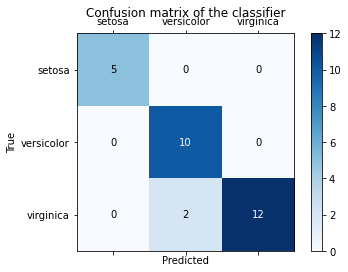

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         5
           1      0.833     1.000     0.909        10
           2      1.000     0.857     0.923        14

    accuracy                          0.931        29
   macro avg      0.944     0.952     0.944        29
weighted avg      0.943     0.931     0.932        29



In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
classifier = svm.SVC(kernel='poly', C=0.1)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

np.set_printoptions(precision=2)
print(metrics.confusion_matrix(y_test, y_pred)) 

plot_confusion_matrix(y_test, y_pred, class_names.tolist())
print(metrics.classification_report(y_test, y_pred, digits=3))

#### Random Forest

In [17]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.utils.multiclass import unique_labels
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
# import some data to play with
iris = datasets.load_iris()
X = np.concatenate([iris.data[:15,],iris.data[50:,]])
y = np.concatenate([iris.target[:15,],iris.target[50:,]])
class_names = iris.target_names

# find parameter
params = {
    'n_estimators': [10, 50, 70, 100],
    'max_depth': [3, 4, 5, 6],
    'random_state': [0, 1, 2, 3],
    'max_features': [1, 2, 3]
}
# classifier = RandomForestClassifier(n_estimators=100) 
classifier = RandomForestClassifier()
best_classifier = GridSearchCV(classifier, param_grid=params, cv=3, refit=True)
fit = best_classifier.fit(X, y)

print('best parameters : ', best_classifier.best_params_)
print('best score : ', best_classifier.best_score_)

best parameters :  {'max_depth': 4, 'max_features': 3, 'n_estimators': 50, 'random_state': 1}
best score :  0.9651372019793073


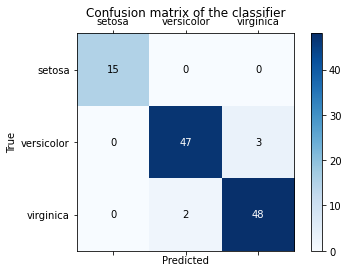

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        15
           1      0.959     0.940     0.949        50
           2      0.941     0.960     0.950        50

    accuracy                          0.957       115
   macro avg      0.967     0.967     0.967       115
weighted avg      0.957     0.957     0.957       115

feature importance:  [0.02 0.02 0.44 0.52]


In [18]:
classifier = RandomForestClassifier(n_estimators=50, max_depth=4, max_features=3, random_state=1) 
y_pred = cross_val_predict(classifier, X, y, cv=10) 
plot_confusion_matrix(y, y_pred, class_names.tolist())
print(metrics.classification_report(y, y_pred, digits=3))

fit = classifier.fit(X, y)
print("feature importance: ", fit.feature_importances_)

#### xgboost

In [ ]:
import xgboost as xgb
from xgboost import plot_tree
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.utils.multiclass import unique_labels
from sklearn.ensemble import RandomForestClassifier 

from sklearn.model_selection import GridSearchCV

iris = datasets.load_iris()
X = np.concatenate([iris.data[:15,],iris.data[50:,]])
y = np.concatenate([iris.target[:15,],iris.target[50:,]])
class_names = iris.target_names

# find parameter
params = {
    'random_state': [0, 1, 2, 3, ],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [0, 1, 2, 3, 4],
    'gamma': [0, 1, 2, 3]
}

classifier = xgb.XGBClassifier()
best_classifier = GridSearchCV(classifier, param_grid=params, cv=3, refit=True)
fit = best_classifier.fit(X, y)

print('best parameters : ', best_classifier.best_params_)
print('best score : ', best_classifier.best_score_)

best parameters :  {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'random_state': 0}
best score :  0.9651372019793073


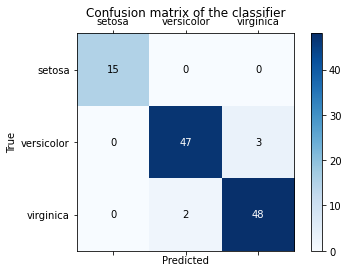

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        15
           1      0.959     0.940     0.949        50
           2      0.941     0.960     0.950        50

    accuracy                          0.957       115
   macro avg      0.967     0.967     0.967       115
weighted avg      0.957     0.957     0.957       115

feature importance:  [0.   0.   0.42 0.58]


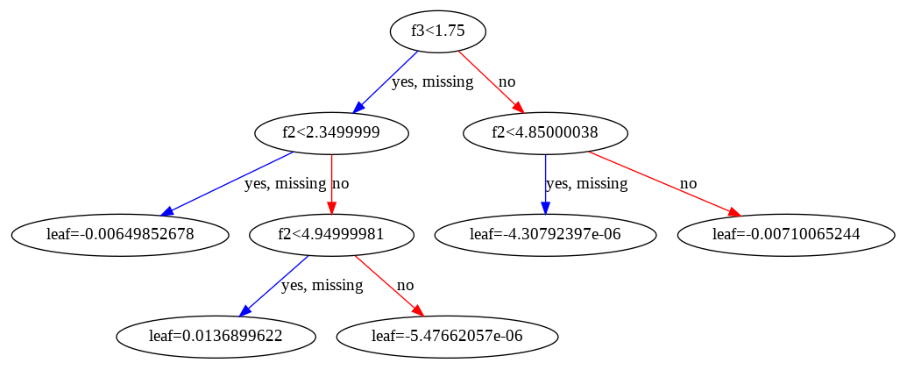

In [ ]:
classifier = xgb.XGBClassifier(gamma=0, random_state=0, learning_rate=0.01, max_depth=3)

y_pred = cross_val_predict(classifier, X, y, cv=10)
plot_confusion_matrix(y, y_pred, class_names.tolist())
print(metrics.classification_report(y, y_pred, digits=3))

fit = classifier.fit(X, y)
print("feature importance: ", fit.feature_importances_)

fig, ax = plt.subplots(figsize=(16, 16))
xgb.plot_tree(classifier, num_trees=4, ax=ax)
plt.show()

## 2) Feature scaling matters: how helpful is it to do feature scaling in PCA?
Each sample in the IRIS dataset contains four dimensional vectors. Use PCA to reduce it into two dimensions with and without scaling (please use the original dataset: 150 samples). We use PCA for feature extraction: 4 dimensions => 2 dimensions. Please use SVM and check how much improvements you can get by doing feature scaling (i.e., comparing two cases: with and without scaling). 

You can find the related answers in [this article](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py). 

Not scaled [[-2.68  0.32]
 [-2.71 -0.18]
 [-2.89 -0.14]
 [-2.75 -0.32]
 [-2.73  0.33]]
Scaled [[-2.26  0.48]
 [-2.08 -0.67]
 [-2.36 -0.34]
 [-2.3  -0.6 ]
 [-2.39  0.65]]


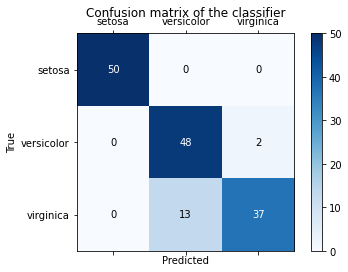

Not scaled               precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      0.787     0.960     0.865        50
           2      0.949     0.740     0.831        50

    accuracy                          0.900       150
   macro avg      0.912     0.900     0.899       150
weighted avg      0.912     0.900     0.899       150



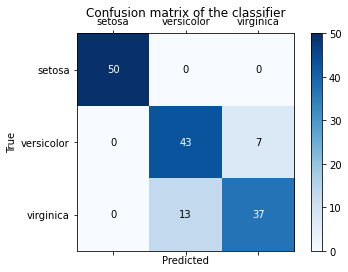

Scaled               precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      0.768     0.860     0.811        50
           2      0.841     0.740     0.787        50

    accuracy                          0.867       150
   macro avg      0.870     0.867     0.866       150
weighted avg      0.870     0.867     0.866       150



In [33]:
# Your answer
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

classifier = svm.SVC(kernel='linear', C=0.01)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.astype(np.float64))

# PCA
pca = PCA(n_components = 2, svd_solver = 'full')
principalComponents = pca.fit_transform(X)  
principalComponents_scaled = pca.fit_transform(X_scaled)  
print('Not scaled', principalComponents[:5])
print('Scaled', principalComponents_scaled[:5])

y_pred_not_scaled = cross_val_predict(classifier, principalComponents, y, cv=10)
y_pred_scaled = cross_val_predict(classifier, principalComponents_scaled, y, cv=10)

plot_confusion_matrix(y, y_pred_not_scaled, class_names.tolist())
print('Not scaled', metrics.classification_report(y, y_pred_not_scaled, digits=3))

plot_confusion_matrix(y, y_pred_scaled, class_names.tolist())
print('Scaled', metrics.classification_report(y, y_pred_scaled, digits=3))

##3) Binarizer & Metrics
We used "LabelBinarizer()" to transform the multi-label dataset to the binary-label dataset (one-vs-all) for binary classification as we did in Precision-Recall & ROC examples. Please use built-in libraries that calculate precision, recall, and f-scores to check whether you have the same results, when you do 10-fold cross-validation. 

In [60]:
# Your answer
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn.utils.multiclass import unique_labels

from sklearn.preprocessing import label_binarize
from sklearn import linear_model

from sklearn.ensemble import RandomForestClassifier 


# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

Y = label_binarize(y, classes=[0, 1, 2]) 
n_classes = Y.shape[1]

classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = cross_val_predict(classifier, X, y, cv=5)
y_pred_10 = cross_val_predict(classifier, X, y, cv=10)

for i in range(n_classes):
  print('-----------------------\n', class_names[i])
 
  forest_clf = RandomForestClassifier(n_estimators=100)

  # getting class probabilities for PR & ROC analyses 
  # cross_val_score(svc, x, y, cv=k_fold, scoring='precision_macro')
  y_probas_forest = cross_val_predict(forest_clf, X, Y[:, i], cv=5, method="predict_proba")
  y_probas_forest_10fold = cross_val_predict(forest_clf, X, Y[:, i], cv=10, method="predict_proba")
  y_scores = y_probas_forest[:, 1]
  y_scores_10fold = y_probas_forest_10fold[:, 1]
  
  precisions, recalls, thresholds = metrics.precision_recall_curve(Y[:, 0], y_scores)
  precisions_10, recalls_10, thresholds_10 = metrics.precision_recall_curve(Y[:, 0], y_scores_10fold)
  # print(y_scores)
  print("Precisions:", precisions)
  print("Recalls:", recalls)
  print("F-scores", metrics.f1_score(y, y_pred, average='macro'))
  print("AUC_ROC: ", metrics.roc_auc_score(Y[:, i], y_scores))

  print("10 fold Precisions:", precisions_10)
  print("10 fold Recalls:", recalls_10)
  print("10 F-scores", metrics.f1_score(y, y_pred_10, average='macro'))
  print("10 fold AUC_ROC: ", metrics.roc_auc_score(Y[:, i], y_scores_10fold))

-----------------------
 setosa
Precisions: [1. 1. 1. 1. 1. 1.]
Recalls: [1.   0.94 0.92 0.9  0.86 0.  ]
F-scores 0.9194847020933977
AUC_ROC:  1.0
10 fold Precisions: [1. 1. 1. 1. 1.]
10 fold Recalls: [1.   0.98 0.94 0.9  0.  ]
10 F-scores 0.9191919191919192
10 fold AUC_ROC:  1.0
-----------------------
 versicolor
Precisions: [0.33 0.12 0.06 0.04 0.04 0.04 0.04 0.02 0.02 0.02 0.02 0.02 0.02 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
Recalls: [1.   0.22 0.1  0.06 0.06 0.06 0.06 0.02 0.02 0.02 0.02 0.02 0.02 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
F-scores 0.9194847020933977
AUC_ROC:  0.9884
10 fold Precisions: [0.33 0.12 0.09 0.04 0.04 0.02 0.02 0.02 0.02 0.02 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   1.  ]
10 fold Recalls: [1.   0.2  0.14